## Logistic regression for a binary classification with a regularization
<hr>

## 0. Import library
<hr>
Import library

In [1]:
# Import libraries

# math library
import numpy as np

# visualization library
%matplotlib inline
from IPython.display import set_matplotlib_formats
set_matplotlib_formats('png2x','pdf')
import matplotlib.pyplot as plt

# machine learning library
from sklearn.linear_model import LogisticRegression

# 3d visualization
from mpl_toolkits.mplot3d import axes3d

# computational time
import time

import math


## 1. Training Data
<hr>

1-1. Load dataset

In [72]:
# import data with numpy
data_train  = np.loadtxt('training.txt', delimiter=',')
data_test   = np.loadtxt('testing.txt', delimiter=',')

# number of training data
number_data_train   = data_train.shape[0] 
number_data_test    = data_test.shape[0]

# training data
x1_train            = data_train[:,0] # feature 1
x2_train            = data_train[:,1] # feature 2
idx_class0_train    = (data_train[:,2]==0) # index of class0
idx_class1_train    = (data_train[:,2]==1) # index of class1

1-2. Plot the training data

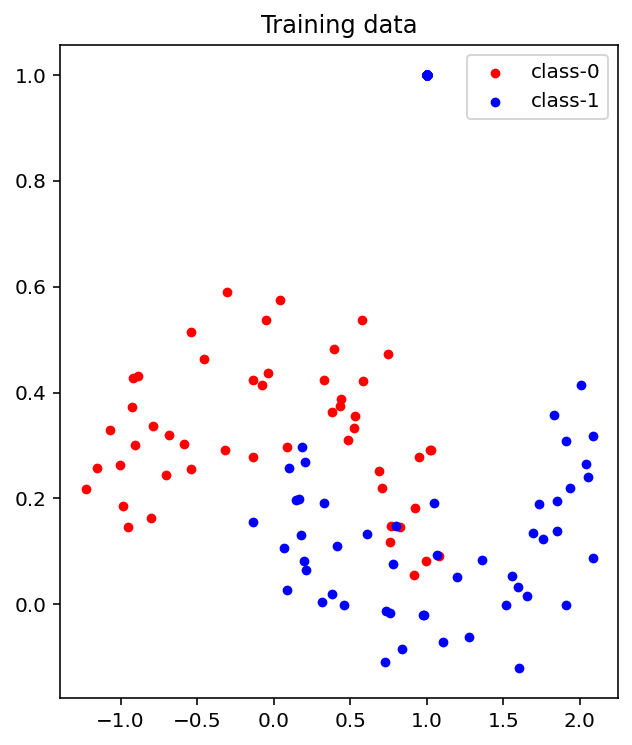

In [73]:
plt.figure(1,figsize=(5,6))
plt.scatter(x1_train[idx_class0_train], x2_train[idx_class0_train], s=60, c='r', marker='.', label='class-0') 
plt.scatter(x1_train[idx_class1_train], x2_train[idx_class1_train], s=60, c='b', marker='.', label='class-1')
plt.title('Training data')
plt.legend()
plt.show()

## 2. Testing Data 
<hr>

2-1. Load dataset

In [74]:
# testing data
x1_test             = data_test[:,0] # feature 1
x2_test             = data_test[:,1] # feature 2
idx_class0_test     = (data_test[:,2]==0) # index of class0
idx_class1_test     = (data_test[:,2]==1) # index of class1

2-2. Plot the testing data

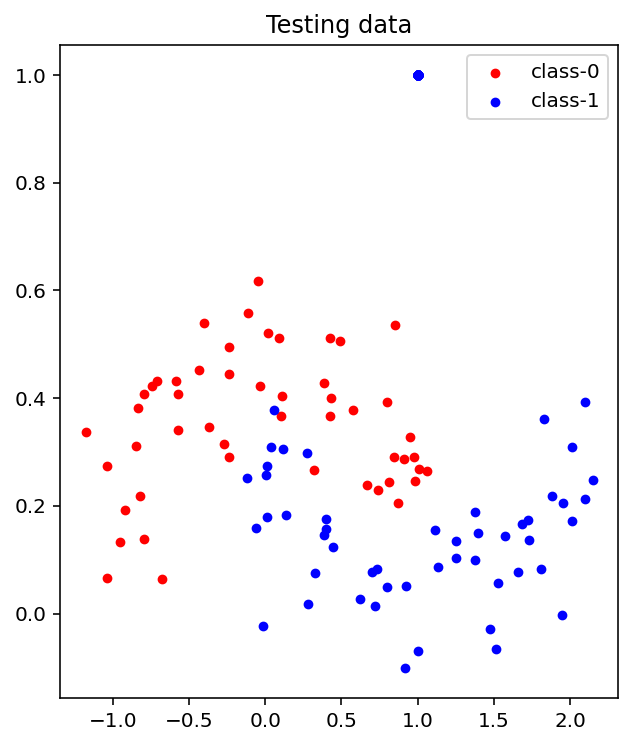

In [75]:
plt.figure(1,figsize=(5,6))
plt.scatter(x1_test[idx_class0_test], x2_test[idx_class0_test], s=60, c='r', marker='.', label='class-0') 
plt.scatter(x1_test[idx_class1_test], x2_test[idx_class1_test], s=60, c='b', marker='.', label='class-1')
plt.title('Testing data')
plt.legend()
plt.show()

## 3. Logistic regression with a high dimensional feature function
<hr>

3-1. Sigmoid/logistic function
<hr>

$$
\sigma(\eta) = \frac{1}{1 + \exp^{-\eta}}
$$

In [76]:
def sigmoid(z):
            
    sigmoid_f = 1 / (1 + np.exp(-z))
    
    return sigmoid_f 

3-2 .define a prediction function
<hr>

$$
\begin{aligned}
z &= g(x, y;\theta)
\end{aligned}
$$

In [250]:
import random as rand

w_init = np.zeros([100, 1])
for i in range(100) :
    w_init[i] = rand.uniform(0, 1)

print(w_init)

[[0.79859171]
 [0.3307782 ]
 [0.69019568]
 [0.57318204]
 [0.90526076]
 [0.91137382]
 [0.54907602]
 [0.10280515]
 [0.13580378]
 [0.86222606]
 [0.43785234]
 [0.89502691]
 [0.11603494]
 [0.7866554 ]
 [0.59566115]
 [0.11408815]
 [0.55425938]
 [0.7637074 ]
 [0.78092612]
 [0.88463166]
 [0.35342439]
 [0.3104755 ]
 [0.27902198]
 [0.59406415]
 [0.52587881]
 [0.62686167]
 [0.3287029 ]
 [0.88712536]
 [0.12175692]
 [0.03315178]
 [0.67736471]
 [0.35514324]
 [0.65309631]
 [0.24860676]
 [0.67578513]
 [0.70578669]
 [0.36472204]
 [0.99849807]
 [0.18524237]
 [0.14214949]
 [0.84379049]
 [0.45320891]
 [0.50337262]
 [0.20174229]
 [0.84245823]
 [0.55513573]
 [0.51385666]
 [0.19040553]
 [0.18014312]
 [0.27166354]
 [0.0685644 ]
 [0.87324496]
 [0.65707011]
 [0.9488262 ]
 [0.33591254]
 [0.61885752]
 [0.14298981]
 [0.3965217 ]
 [0.4323871 ]
 [0.88726647]
 [0.53154799]
 [0.17727245]
 [0.1513089 ]
 [0.0407124 ]
 [0.44669531]
 [0.86997789]
 [0.49144068]
 [0.64991396]
 [0.88005239]
 [0.29976104]
 [0.61077802]
 [0.08

In [297]:
from random import *

def makeXY(x1, x2):
    
    n = len(x1)
    m = 10
    result = np.zeros([n, m * m])
    
    for i in range(n):
        for j in range(m):
            for k in range(m):
                result[i][j * m + k] = (x1[i] ** j) * (x2[i] ** k)
    
    return result
    

def f_pred(xy, w):
    
    return sigmoid(np.dot(xy, w))

xy_train = makeXY(x1_train, x2_train)
z_train = f_pred(xy_train, w_init)

## 4. Objective Function with a regularization term
<hr>

4-1. define objective function

In [342]:
def loss_func(y_pred, y, lamda, w):
    n = len(y)
    epsilon = 1e-4
    loss = np.dot(-(y.T), np.log(y_pred + epsilon)) - np.dot((1-y).T, np.log(1 - y_pred + epsilon))
    return (loss / n + (lamda / 2) * np.dot(w.T, w))[0][0]


y_train = data_train[:,2][:,None] # label
print(loss_func(z_train, y_train, 0.01 ,w_init))

0.7456916787851865


4-2. define gradient of objective funtion

In [343]:
def grad_loss(y_pred, y, xy_train, lamda, w):
    n = len(y)
    temp1 = (2 * np.dot(xy_train.T, y_pred - y)) / n
    temp2 = lamda * w
    return temp1 + temp2

## 5. Gradient Descent
<hr>

5-1. define gradient descent function

In [388]:
def grad_desc(xy_train, y , w_init, tau, lamda, max_iter):

    L_iters = np.zeros([max_iter]) # record the loss values
    w = w_init # initialization
    
    for i in range(max_iter): # loop over the iterations
        if i % 1500 == 0 :
            tau = tau * 0.9
        y_pred = f_pred(xy_train, w)# linear predicition function   
        grad_f = grad_loss(y_pred, y, xy_train, lamda, w)# gradient of the loss  
        w = w - tau * grad_f # update rule of gradient descent  
        L_iters[i] = loss_func(y_pred, y, lamda, w) # save the current loss value 
        
    return w, L_iters

## 6. Hyper-parameter
<hr>

6-1. define lamda & learning rate

In [385]:
lamdas = [1e-5, 1e-4, 1e-3, 1e-2, 1e-1]

## 7.Training
<hr>

7-1. lamda : 0.00001

0.08058232849671593
0.054471939000234455


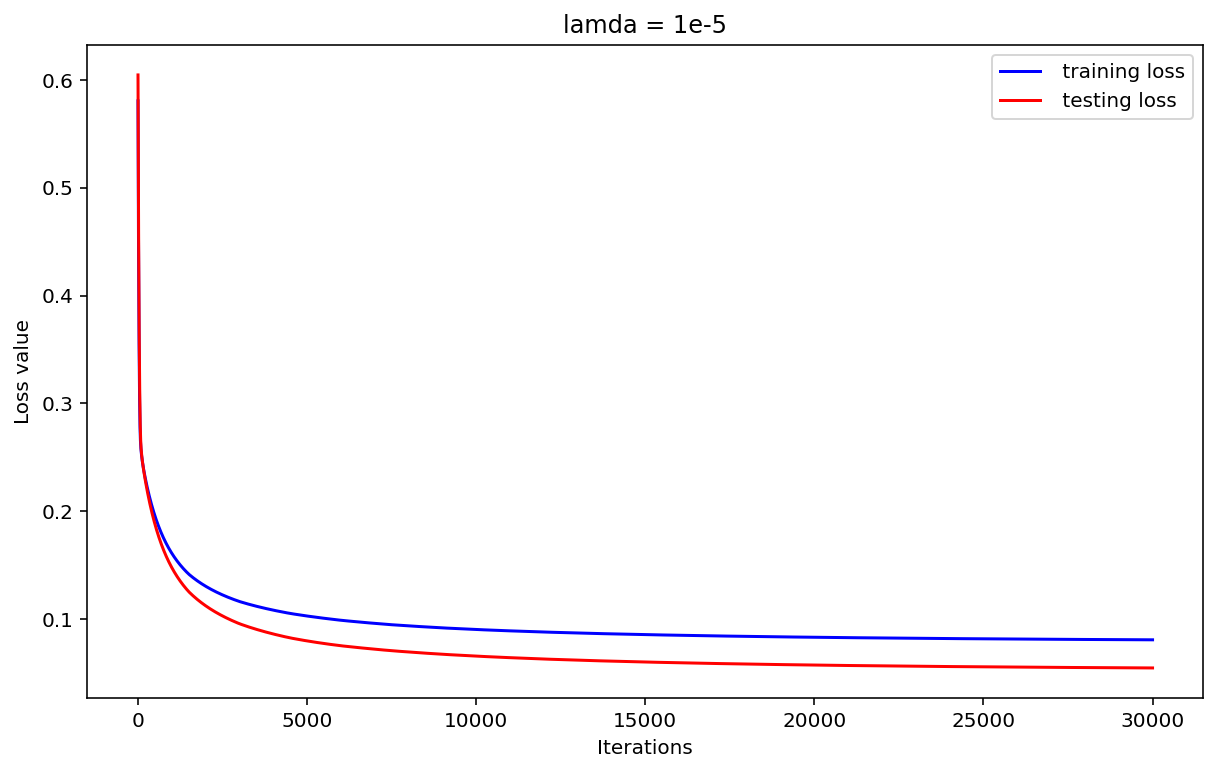

In [390]:
learning_rate = 1e-1
max_iter = 30000

xy_train = makeXY(x1_train, x2_train)
xy_test = makeXY(x1_test, x2_test)

y_train = data_train[:,2][:,None] # label
y_test = data_test[:,2][:,None] # label

# run gradient descent algorithm
w_train_0, L_iters_train_0 = grad_desc(xy_train, y_train, w_init, learning_rate, lamdas[0], max_iter)
w_test_0, L_iters_test_0 = grad_desc(xy_test, y_test, w_init, learning_rate, lamdas[0], max_iter)

print(L_iters_train_0[max_iter-1])
print(L_iters_test_0[max_iter-1])

# plot
plt.figure(3, figsize=(10,6))
plt.plot(np.array(range(max_iter)), L_iters_train_0, c = 'blue', label = ' training loss')
plt.plot(np.array(range(max_iter)), L_iters_test_0, c = 'red', label = ' testing loss')
plt.title('lamda = 1e-5')
plt.legend(loc = 'upper right')
plt.xlabel('Iterations')
plt.ylabel('Loss value')
plt.show()

7-2. lamda : 0.0001

0.0918961618224011
0.06803971129628644


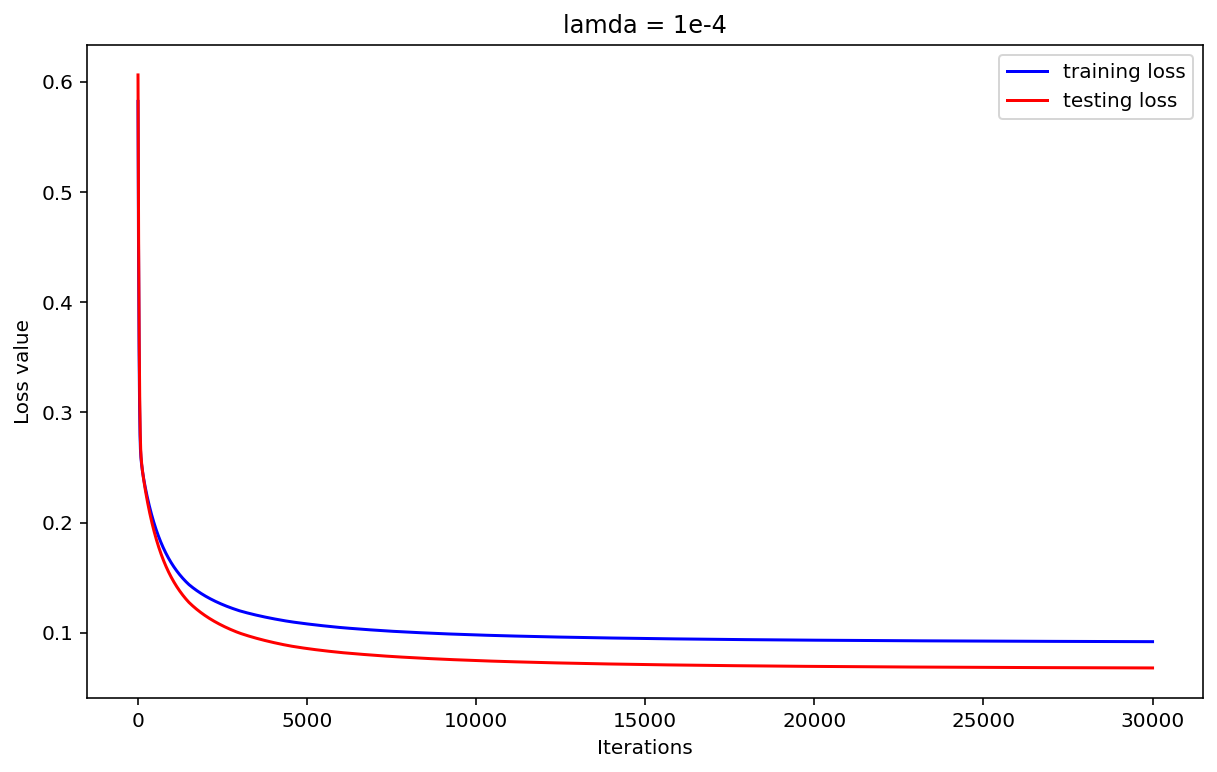

In [391]:
learning_rate = 1e-1
max_iter = 30000

# run gradient descent algorithm
w_train_1, L_iters_train_1 = grad_desc(xy_train, y_train, w_init, learning_rate, lamdas[1], max_iter)
w_test_1, L_iters_test_1 = grad_desc(xy_test, y_test, w_init, learning_rate, lamdas[1], max_iter)

print(L_iters_train_1[max_iter-1])
print(L_iters_test_1[max_iter-1])

# plot
plt.figure(3, figsize=(10,6))
plt.plot(np.array(range(max_iter)), L_iters_train_1, c = 'blue', label = 'training loss')
plt.plot(np.array(range(max_iter)), L_iters_test_1, c = 'red', label = 'testing loss')
plt.title('lamda = 1e-4')
plt.legend(loc = 'upper right')
plt.xlabel('Iterations')
plt.ylabel('Loss value')
plt.show()

7-3. lamda : 0.001

0.14603117420254233
0.13074951784437444


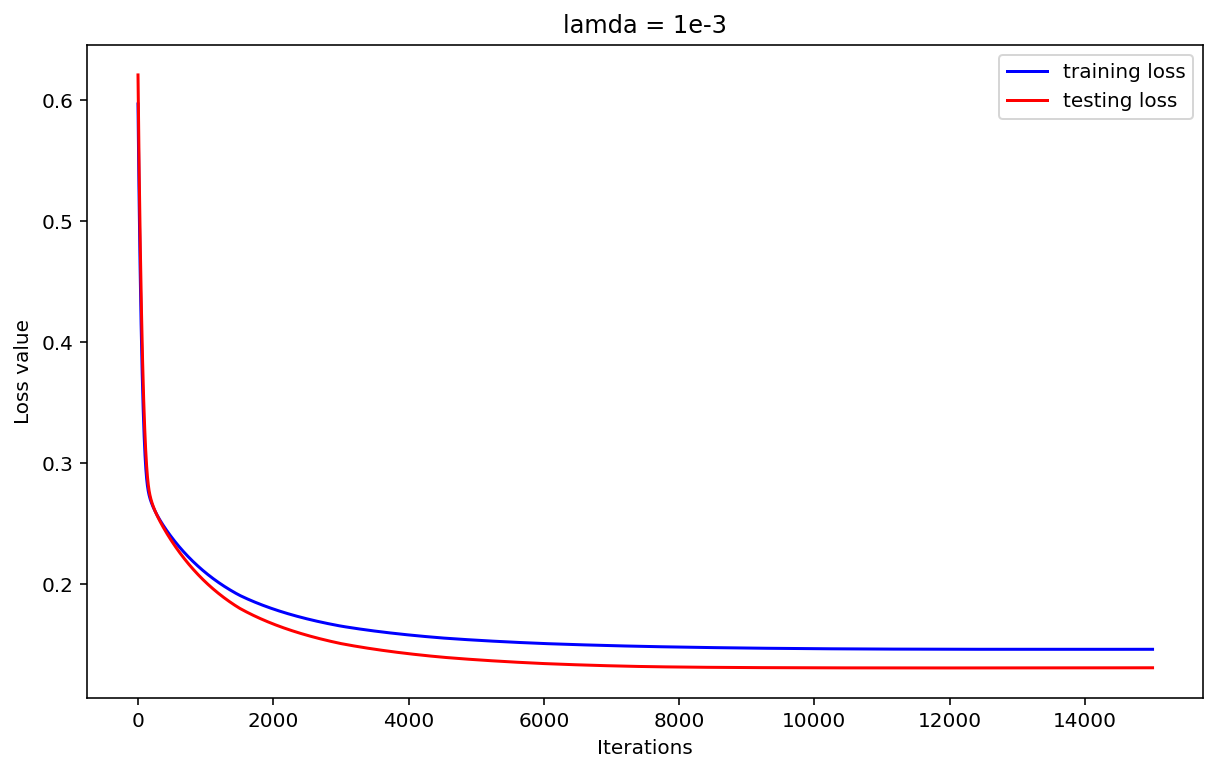

In [399]:
learning_rate = 5e-2
max_iter = 15000

# run gradient descent algorithm
w_train_2, L_iters_train_2 = grad_desc(xy_train, y_train, w_init, learning_rate, lamdas[2], max_iter)
w_test_2, L_iters_test_2 = grad_desc(xy_test, y_test, w_init, learning_rate, lamdas[2], max_iter)

print(L_iters_train_2[max_iter-1])
print(L_iters_test_2[max_iter-1])

# plot
plt.figure(3, figsize=(10,6))
plt.plot(np.array(range(max_iter)), L_iters_train_2, c = 'blue', label = 'training loss')
plt.plot(np.array(range(max_iter)), L_iters_test_2, c = 'red', label = 'testing loss')
plt.title('lamda = 1e-3')
plt.legend(loc = 'upper right')
plt.xlabel('Iterations')
plt.ylabel('Loss value')
plt.show()

7-4. lamda : 0.01

0.22152326454302856
0.21811414487147757


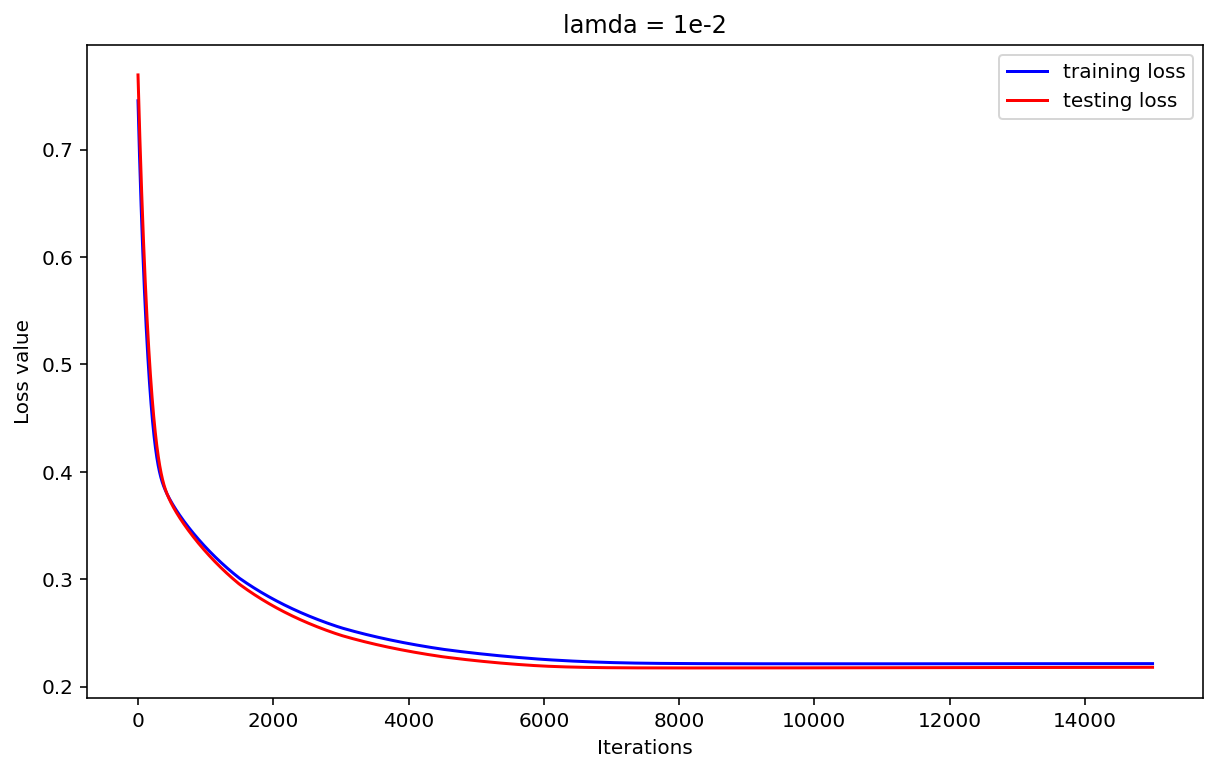

In [404]:
learning_rate = 2e-2
max_iter = 15000

# run gradient descent algorithm
w_train_3, L_iters_train_3 = grad_desc(xy_train, y_train, w_init, learning_rate, lamdas[3], max_iter)
w_test_3, L_iters_test_3 = grad_desc(xy_test, y_test, w_init, learning_rate, lamdas[3], max_iter)

print(L_iters_train_3[max_iter-1])
print(L_iters_test_3[max_iter-1])

# plot
plt.figure(3, figsize=(10,6))
plt.plot(np.array(range(max_iter)), L_iters_train_3, c = 'blue', label = 'training loss')
plt.plot(np.array(range(max_iter)), L_iters_test_3, c = 'red', label = 'testing loss')
plt.title('lamda = 1e-2')
plt.legend(loc = 'upper right')
plt.xlabel('Iterations')
plt.ylabel('Loss value')
plt.show()

7-5. lamda : 0.1

In [ ]:
learning_rate = 8e-3
max_iter = 15000

# run gradient descent algorithm
w_train_4, L_iters_train_4 = grad_desc(xy_train, y_train, w_init, learning_rate, lamdas[4], max_iter)
w_test_4, L_iters_test_4 = grad_desc(xy_test, y_test, w_init, learning_rate, lamdas[4], max_iter)

print(L_iters_train_4[max_iter-1])
print(L_iters_test_4[max_iter-1])

# plot
plt.figure(3, figsize=(10,6))
plt.plot(np.array(range(max_iter)), L_iters_train_4, c = 'blue', label = 'training loss')
plt.plot(np.array(range(max_iter)), L_iters_test_4, c = 'red', label = 'testing loss')
plt.title('lamda = 1e-1')
plt.legend(loc = 'upper right')
plt.xlabel('Iterations')
plt.ylabel('Loss value')
plt.show()

## 8. Compute the training accuray

the accuracy is computed based on the training data with varying regularization parameters

In [377]:
w_train_list = [w_train_0, w_train_1, w_train_2, w_train_3, w_train_4]
w_test_list = [w_test_0, w_test_1, w_test_2, w_test_3, w_test_4]

In [378]:
xy_train = makeXY(x1_train, x2_train)
y_train = data_train[:,2][:,None] # label

idx_class0_train    = (data_train[:,2]==0) # index of class0
idx_class1_train    = (data_train[:,2]==1) # index of class1
n = y_train.size

# lamdas is [1e-5, 1e-4, 1e-3, 1e-2, 1e-1]
# w_train_list는 각각의 lamda 값으로 훈련했을 때 w 값
for i in range(len(w_train_list)):
    p = f_pred(xy_train, w_train_list[i])
    idx_class0_pred = (p <= 0.5)
    idx_class1_pred = (p > 0.5)
    
    idx_class0_correct = 0
    idx_class1_correct = 0
    for j in range(n):
        if idx_class0_train[j] == idx_class0_pred[j] == True :
            idx_class0_correct += 1

        if idx_class1_train[j] == idx_class1_pred[j] == True:
            idx_class1_correct += 1
            
    accuracy = ((idx_class0_correct + idx_class1_correct) / n) * 100
    print('====== lamda is ', lamdas[i])
    print('total number of data = ', (n))
    print('total number of correctly classified data = ', (idx_class0_correct + idx_class1_correct))
    print('accuracy(%) = ',  accuracy)

====== lamda is  1e-05
total number of data =  200
total number of correctly classified data =  195
accuracy(%) =  97.5
====== lamda is  0.0001
total number of data =  200
total number of correctly classified data =  195
accuracy(%) =  97.5
====== lamda is  0.001
total number of data =  200
total number of correctly classified data =  195
accuracy(%) =  97.5
====== lamda is  0.01
total number of data =  200
total number of correctly classified data =  188
accuracy(%) =  94.0
====== lamda is  0.1
total number of data =  200
total number of correctly classified data =  171
accuracy(%) =  85.5


## 9. Compute the testing accuracy

## 10. Probability Map

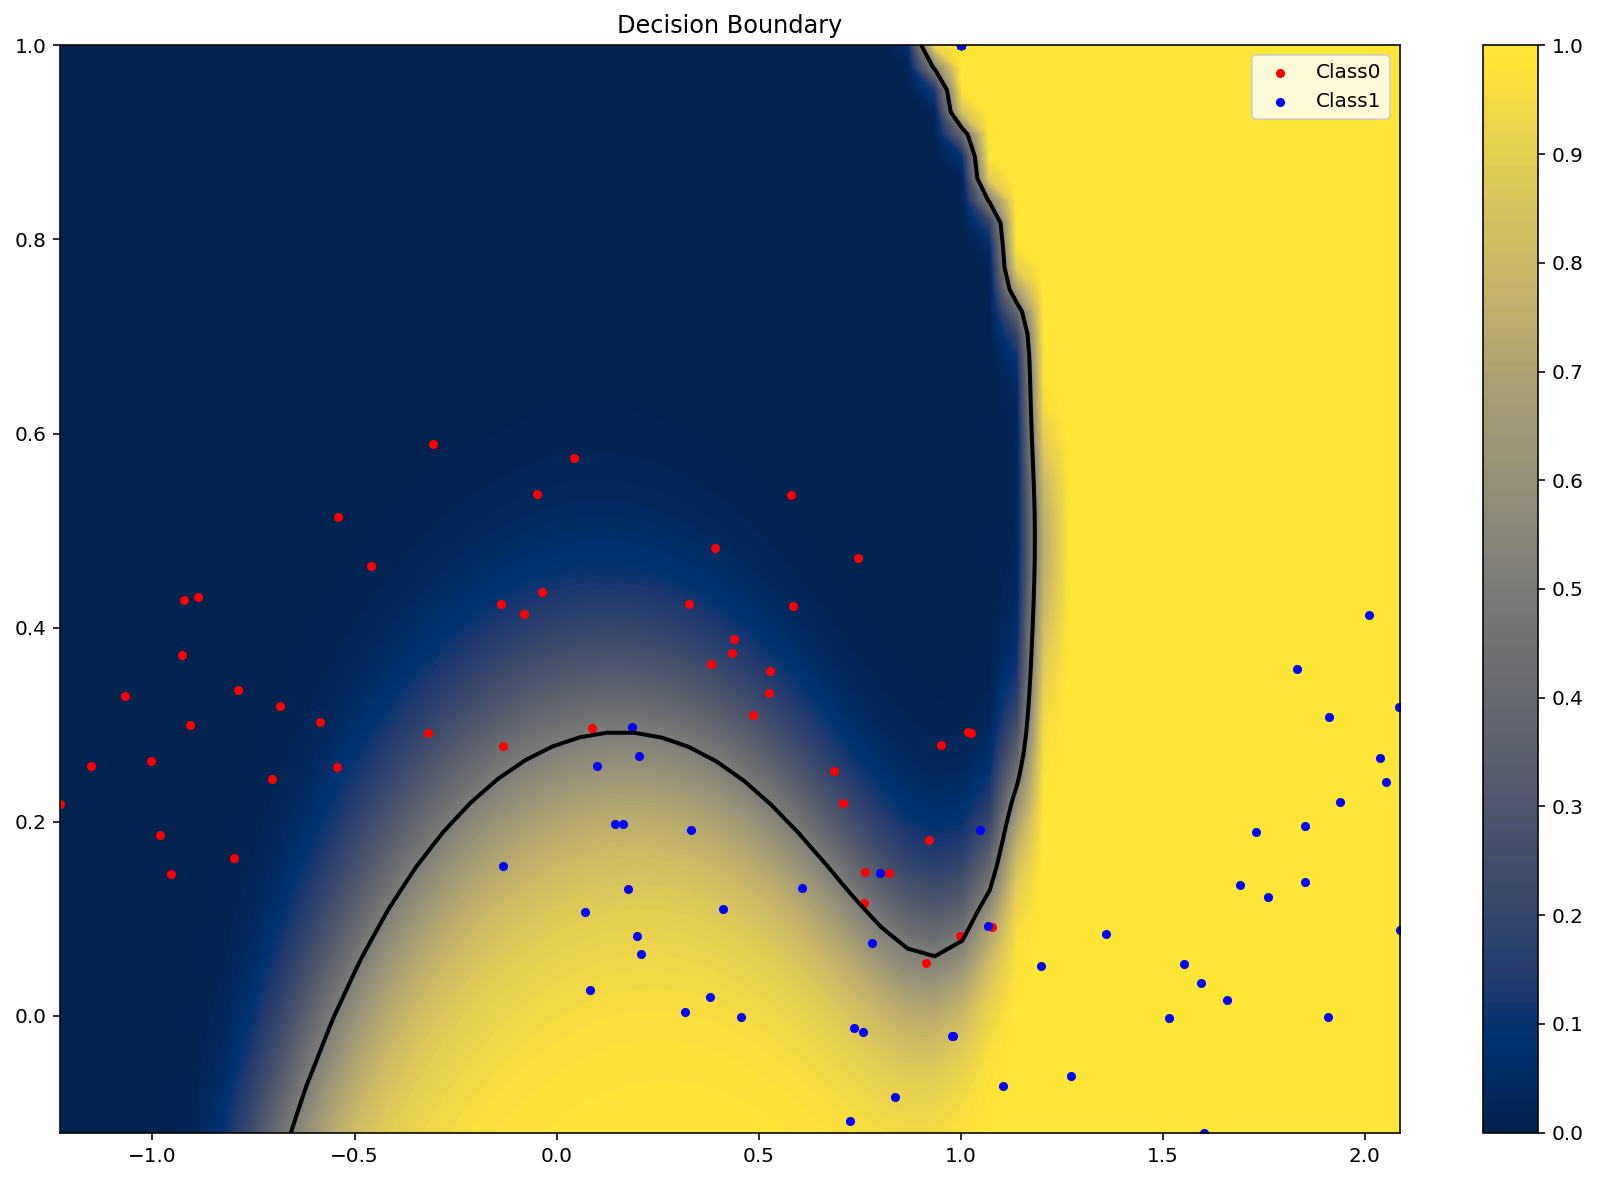

In [381]:
# compute values p(x) for multiple data points x
x1_train_min, x1_train_max = x1_train.min(), x1_train.max() # min and max of grade 1
x2_train_min, x2_train_max = x2_train.min(), x2_train.max() # min and max of grade 2
xx1_train, xx2_train = np.meshgrid(np.linspace(x1_train_min, x1_train_max), np.linspace(x2_train_min, x2_train_max))# create meshgrid

xy_train = makeXY(xx1_train.reshape(2500, -1), xx2_train.reshape(2500, -1))
p0 = f_pred(xy_train, w_train_list[0])
p0 = p0.reshape(len(xx1_train), -1)

# plot
plt.figure(4,figsize=(15,10))

cf = plt.contourf(xx1_train, xx2_train, p0, cmap = 'cividis', levels = 100)
cbar = plt.colorbar(cf, ticks = [0.00, 0.10, 0.20, 0.30, 0.40, 0.50, 0.60, 0.70, 0.80, 0.90, 1.00])
cbar.update_ticks()

plt.scatter(x1_train[idx_class0_train], x2_train[idx_class0_train], s=50, c='r', marker='.', label='Class0') 
plt.scatter(x1_train[idx_class1_train], x2_train[idx_class1_train], s=50, c='b', marker='.', label='Class1')
plt.contour(xx1_train, xx2_train, p0, levels = [0.5], linewidths=2, colors='k')
plt.legend()
plt.title('Decision Boundary')
plt.show()

## Output
<hr>